# Haar Cascade Face Detection

## 1. Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Load Image

In [ ]:
import cv2

# image source : https://unsplash.com/ko/%EC%82%AC%EC%A7%84/hOF1bWoet_Q
image = cv2.imread('/content/drive/MyDrive/colab/Computer-Vision-Course/Data/Images/people.jpg')

## 3. Print Image

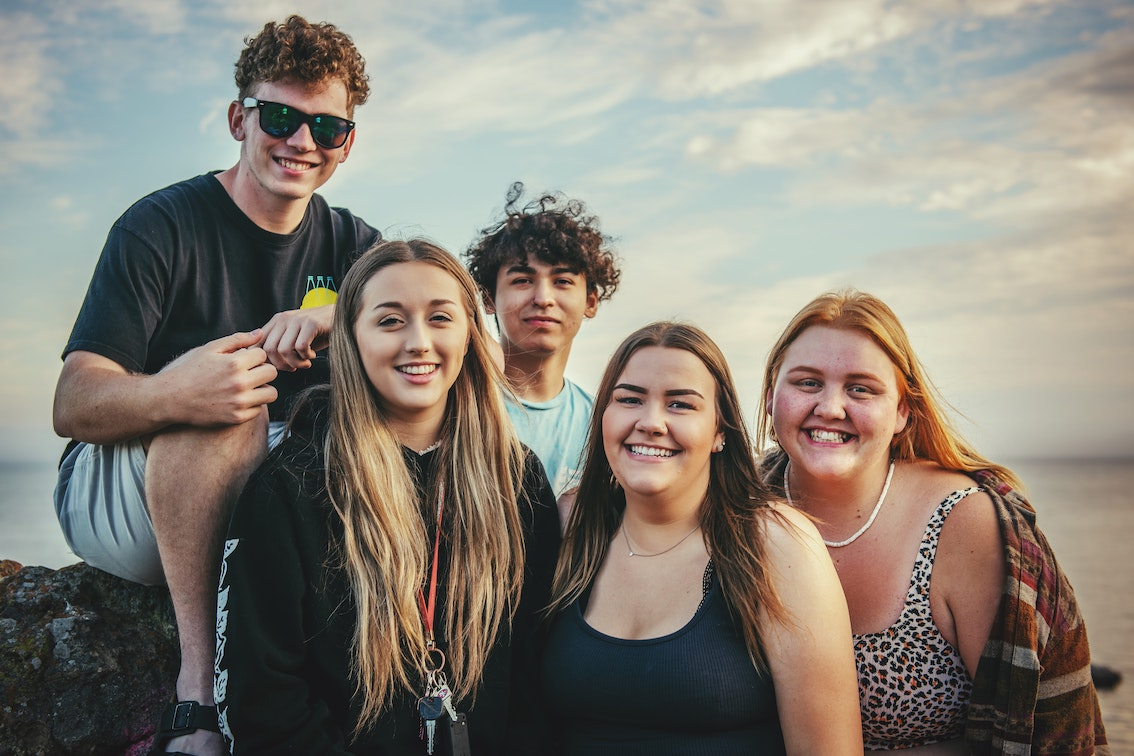

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(image)

In [ ]:
image.shape

(756, 1134, 3)

In [ ]:
image_resized = cv2.resize(image, (755, 500))

In [ ]:
image_resized.shape

(500, 755, 3)

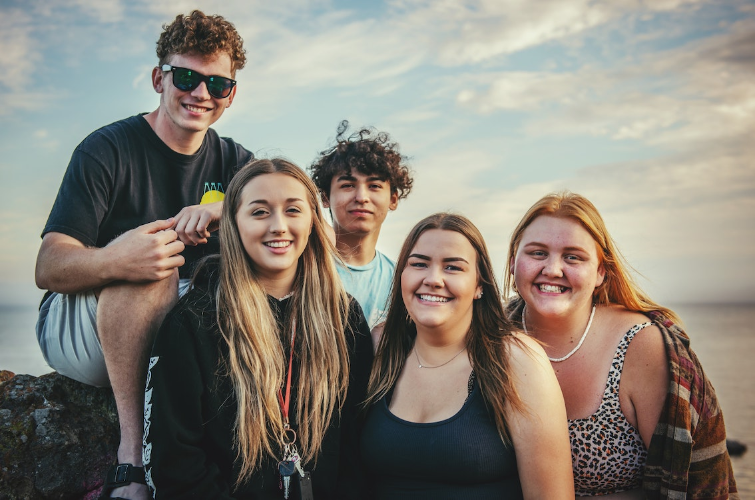

In [ ]:
cv2_imshow(image_resized)

## 4. Face Detection with Haar Cascade Detector

In [ ]:
# Load prebuilt cascade classifier for detecting fontalfaces
cascade_face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/colab/Computer-Vision-Course/Data/Weights/Cascades/haarcascade_frontalface_default.xml')

- You can download other xml files of prebuilt detector on https://github.com/opencv/opencv/tree/master/data/haarcascades 
- Loading xml will load pre-trained detectors

In [ ]:
face_detections = cascade_face_detector.detectMultiScale(image_resized)
face_detections

array([[149,  44, 102, 102],
       [205, 122, 150, 150],
       [324, 156,  75,  75],
       [230, 173,  95,  95],
       [507, 217,  97,  97],
       [388, 229,  92,  92]], dtype=int32)

- Six row means six people have been detected.
- Each row represents a bounding-box.
- The first/second value is left-top x/y coordinate of bounding-box, and the third/fourth value is width/height of bounding-box.

## 5. Draw the Detected Bounding-Box in Image

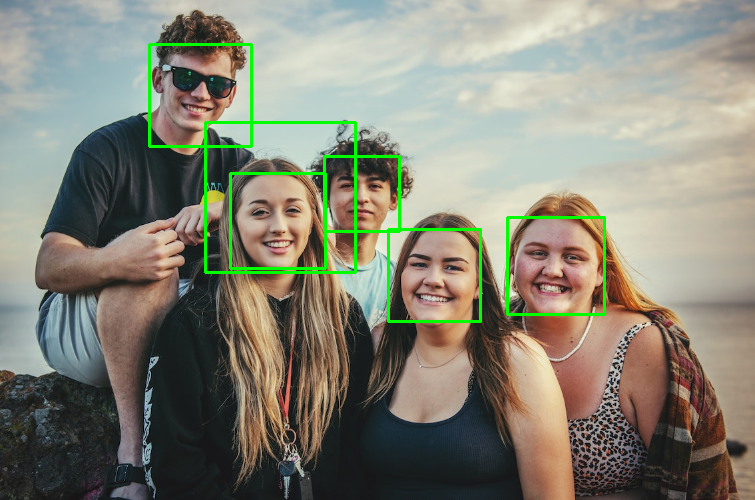

In [ ]:
for (x, y, w, h) in face_detections:
    cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image_resized)

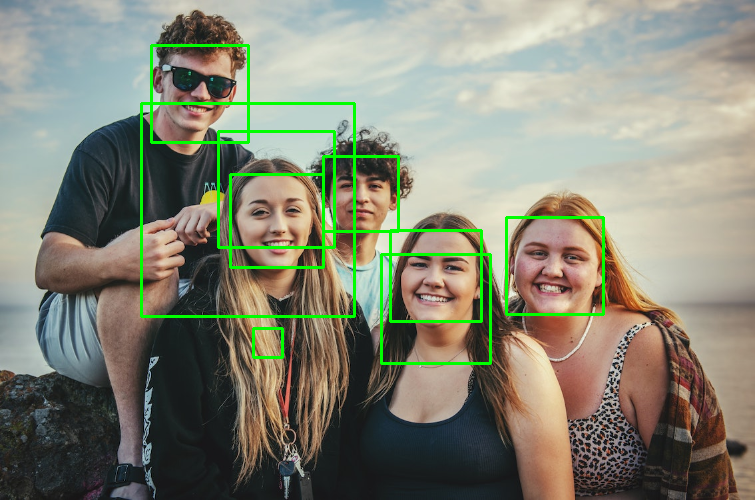

In [ ]:
# Reload the resized image since the bounding-box is already drawn in the resized image.
image_resized = cv2.resize(image, (755, 500))

face_detections = cascade_face_detector.detectMultiScale(image_resized, scaleFactor=1.03)

for (x, y, w, h) in face_detections:
    cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image_resized)

- `scaleFactor` parameter is related to the image scale.
- For example, if the face is far away, it will look very small. Such a small face can be detected by increasing its size through `scaleFactor`. 
- It automatically detects by adjusting the large face small or by adjusting the small face large.
- The smaller the `scaleFactor` value, the more bounding-boxes are found.
- The `scaleFactor` value must be greater than 1. (default=1.1)
- If the value is very large, such as scaleFactor=5, it cannot detect any faces.
- Therefore, it is important to find a `scaleFactor` that fits the image we have.
If the `scaleFactor` value is less than the default value of 1.1, it would find more bounding-boxes which means more false positives.

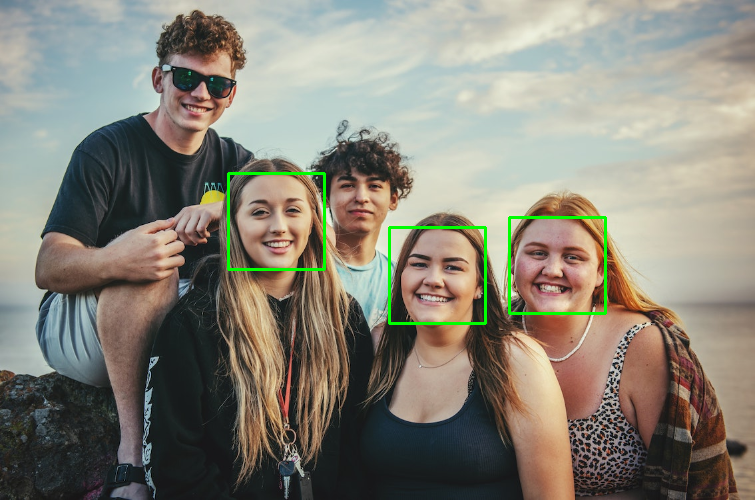

In [ ]:
image_resized = cv2.resize(image, (755, 500))

face_detections = cascade_face_detector.detectMultiScale(image_resized, scaleFactor=2)

for (x, y, w, h) in face_detections:
    cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image_resized)

- Conversely, if the scaleFactor is large, find fewer bounding boxes. 
- Which means false positive decreases.

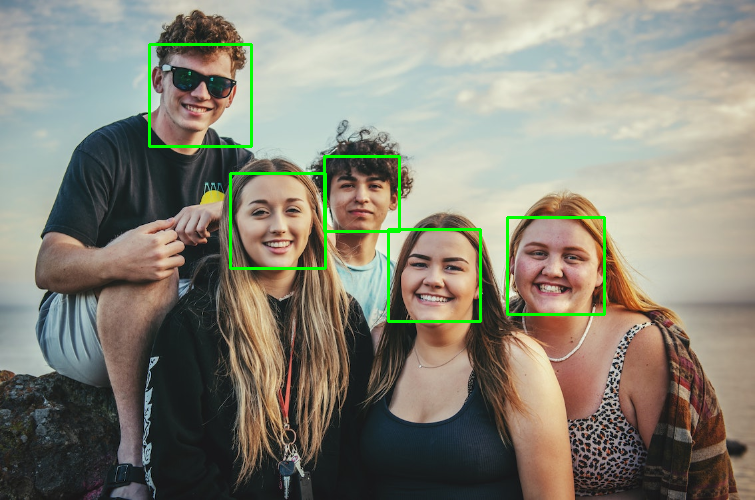

In [ ]:
image_resized = cv2.resize(image, (755, 500))

face_detections = cascade_face_detector.detectMultiScale(image_resized, scaleFactor=1.1, minNeighbors=4)

for (x, y, w, h) in face_detections:
    cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image_resized)

- The cascade face detector draws several candidate bounding-boxes around the face. 
- Among the several bounding-boxes, the bounding-box that detects the face the best is finally selected. 
- `minNeighbors` parameter indicates the number of candidate bounding boxes that must exist around to generate the final bounding-box. 
- If it's 5, you need 5 candidate bounding-boxes nearby to select it. If there are less than five candidate bounding boxes, they are excluded.


- Even if the parameters are adjusted, all faces may not be detected.
- If you adjust the parameters to detect all faces, you would have more false positives. Whether to increase detection quality or number of detection is a trade-off relationship.

## 6. Eye Detection with Haar Cascade Detector

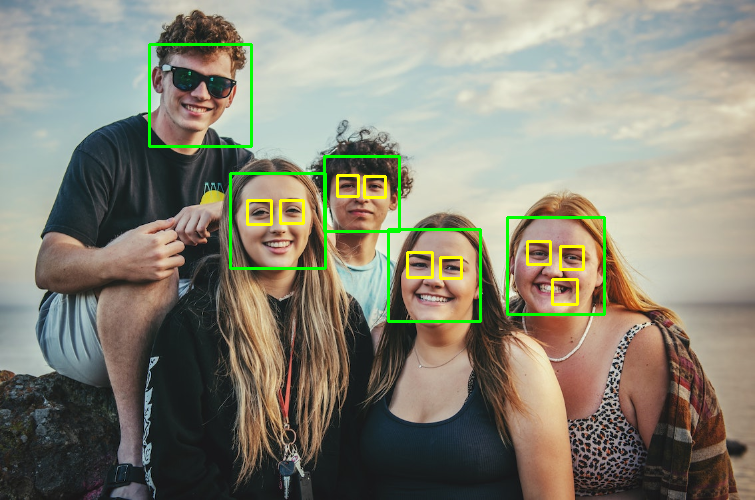

In [ ]:
image_resized = cv2.resize(image, (755, 500))

# Load prebuilt cascade classifier for detecting eye
cascade_eye_detector = cv2.CascadeClassifier('/content/drive/MyDrive/colab/Computer-Vision-Course/Data/Weights/Cascades/haarcascade_eye.xml')

eye_detections = cascade_eye_detector.detectMultiScale(image_resized, scaleFactor=1.05, minNeighbors=6,
                                                       minSize=(10, 10), maxSize=(30, 30))

# Draw face detection bounding-boxs 
for (x, y, w, h) in face_detections:
    cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Draw eye detection bounding-boxs 
for (x, y, w, h) in eye_detections:
    cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 255), 2)
    
cv2_imshow(image_resized)

- `minSize` is a parameter indicating the minimum size of the object.
- The default value of `minSize` is (30, 30), so if there is an object smaller than this, it should be adjusted.

## 7. Face/Eye Detection with Another Image

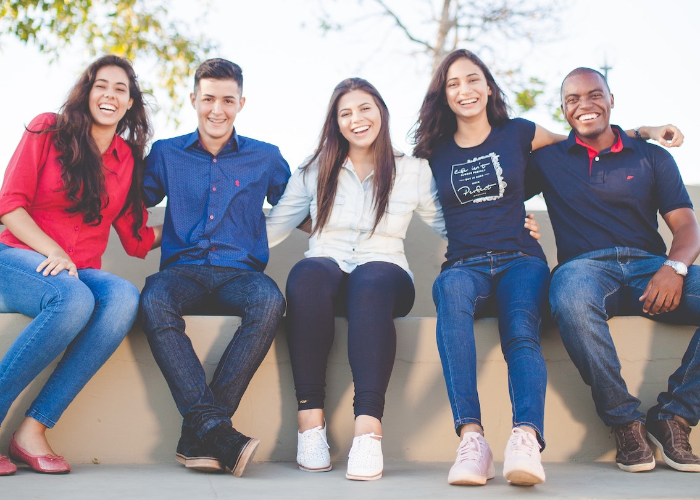

In [ ]:
# image source : https://unsplash.com/ko/%EC%82%AC%EC%A7%84/Q_Sei-TqSlc
image2 = cv2.imread('/content/drive/MyDrive/colab/Computer-Vision-Course/Data/Images/people2.jpg')

image2_resized = cv2.resize(image2, (700, 500))

cv2_imshow(image2_resized)

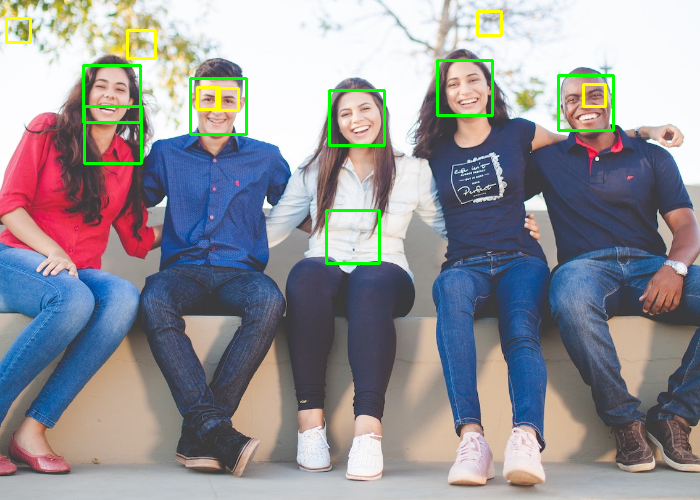

In [ ]:
image2_resized = cv2.resize(image2, (700, 500))

face_detections = cascade_face_detector.detectMultiScale(image2_resized, scaleFactor=1.1, minNeighbors=7)

eye_detections = cascade_eye_detector.detectMultiScale(image2_resized, scaleFactor=1.06, minNeighbors=3,
                                                       maxSize=(32, 32))

# Draw face detection bounding-boxs 
for (x, y, w, h) in face_detections:
    cv2.rectangle(image2_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Draw eye detection bounding-boxs 
for (x, y, w, h) in eye_detections:
    cv2.rectangle(image2_resized, (x, y), (x + w, y + h), (0, 255, 255), 2)
    
cv2_imshow(image2_resized)